Number of nodes: 4039
Number of edges: 88234
Average path length: 3.6925068496963913
Clustering coefficient: 0.6055467186200876
Diameter: 8


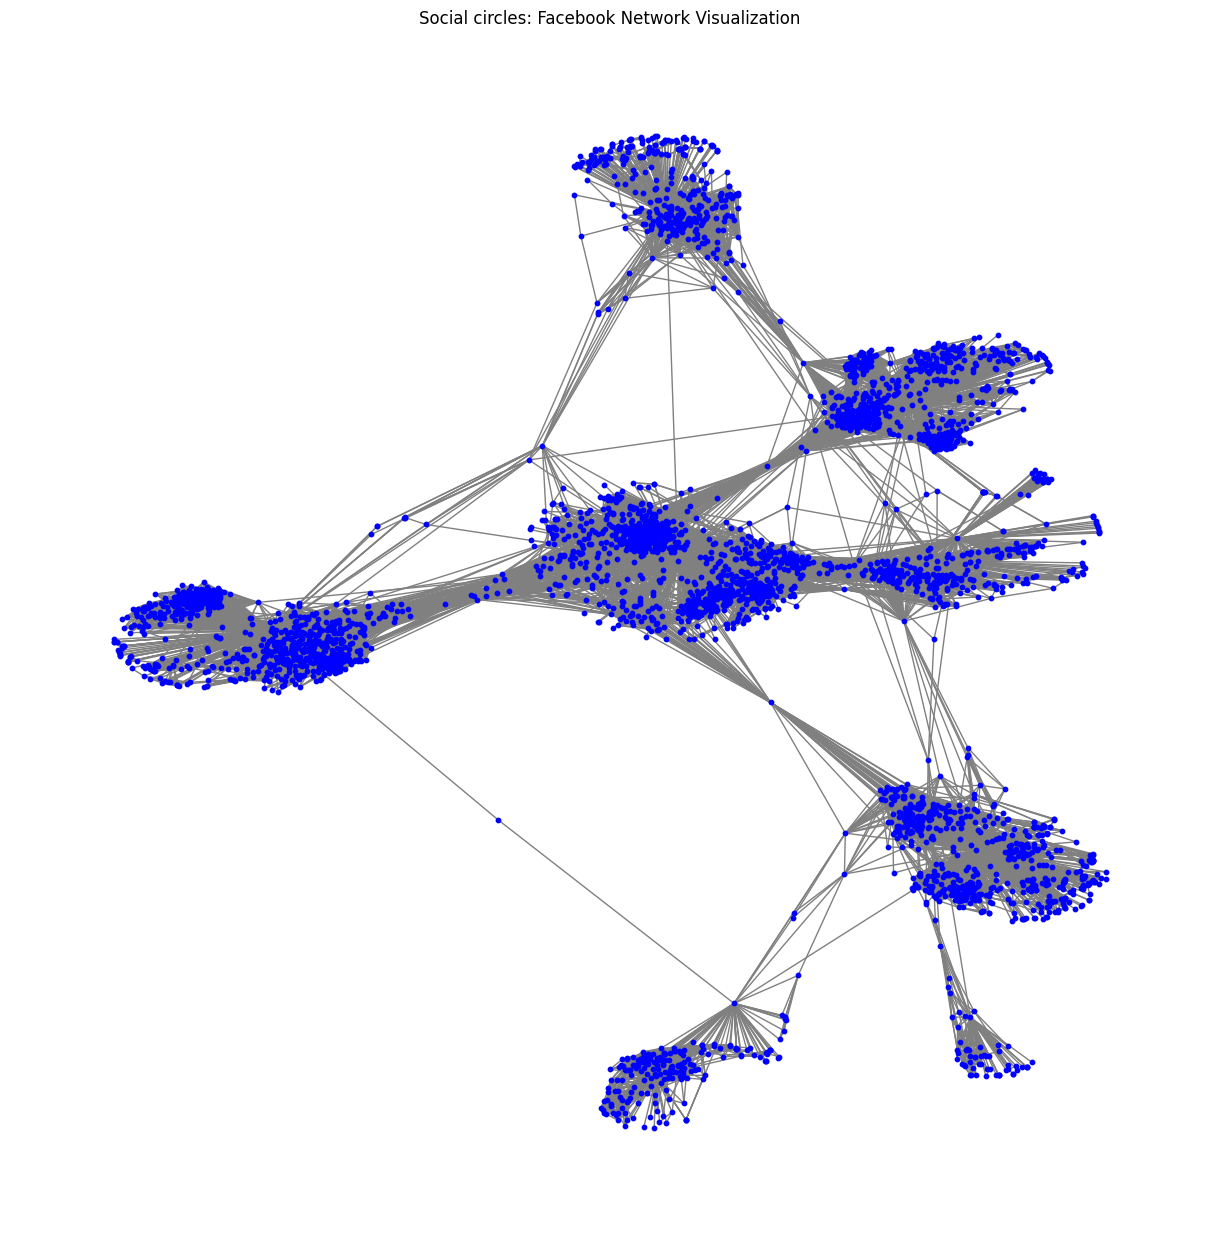

In [1]:
import networkx as nx
import matplotlib.pyplot as plt


actor_network_path = '/content/facebook_combined.txt.gz'

# Create a graph from the edge list
G_actor = nx.read_edgelist(actor_network_path)

# Basic information about the network
num_nodes = G_actor.number_of_nodes()
num_edges = G_actor.number_of_edges()

# Calculate basic network metrics
try:
    avg_path_length = nx.average_shortest_path_length(G_actor)
except nx.NetworkXError:
    avg_path_length = None

clustering_coefficient = nx.average_clustering(G_actor)

try:
    diameter = nx.diameter(G_actor)
except nx.NetworkXError:
    diameter = None


print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")
print(f"Average path length: {avg_path_length}")
print(f"Clustering coefficient: {clustering_coefficient}")
print(f"Diameter: {diameter}")

# Visualize the network
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G_actor, seed=42)  # Positions for all nodes
nx.draw(G_actor, pos, node_size=10, node_color='blue', edge_color='gray', with_labels=False)
plt.title('Social circles: Facebook Network Visualization')
plt.show()

In [3]:
pip install python-louvain

In [7]:
pip install python-igraph


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 40.7 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/networkx/drawing/nx_pylab.py:450: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  node_collection = ax.scatter(


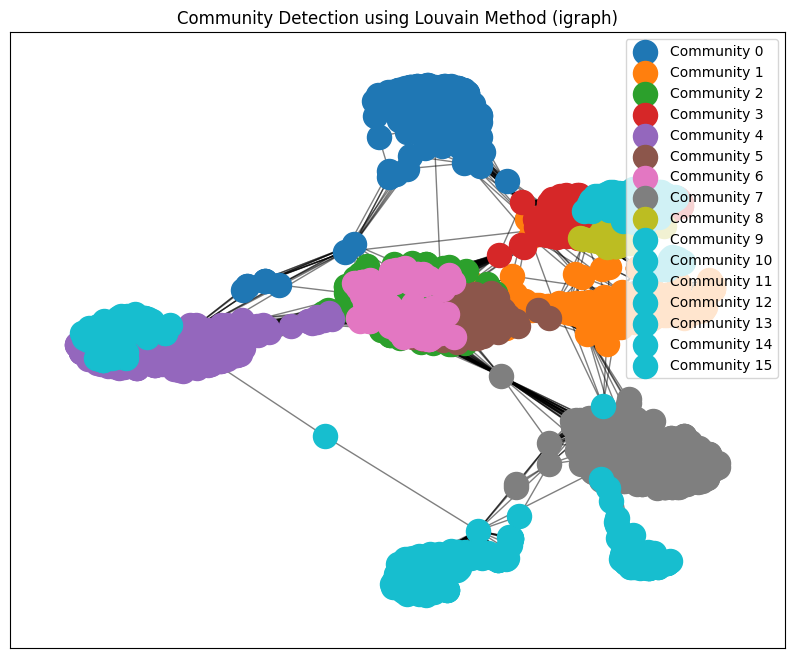

In [8]:
import networkx as nx
import matplotlib.pyplot as plt
import community as community_louvain
import igraph as ig



ig_graph = ig.Graph.from_networkx(G_actor)


partition = ig_graph.community_multilevel()

# Prepare data for plotting
membership = partition.membership
num_communities = max(membership) + 1

# Map igraph community membership to node IDs in NetworkX graph
nx.set_node_attributes(G_actor, {node: {"community": membership[i]} for i, node in enumerate(G_actor.nodes)})

# Draw the graph with communities
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G_actor, seed=42)  # Positions for all nodes

# Draw nodes and edges based on the community partition
for community_id in range(num_communities):
    nodes = [node for node, attrs in G_actor.nodes(data=True) if attrs["community"] == community_id]
    nx.draw_networkx_nodes(G_actor, pos, nodelist=nodes, node_color=plt.cm.tab10(community_id), label=f'Community {community_id}')
nx.draw_networkx_edges(G_actor, pos, alpha=0.5)
plt.title("Community Detection using Louvain Method (igraph)")
plt.legend()
plt.show()
